## TwoLayerNet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from common.layers import *
from collections import OrderedDict
from dataset.mnist import load_mnist

In [3]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

epoch:1  | train loss:2.3011, train acc:0.1111, test acc:0.1162
epoch:2  | train loss:0.2866, train acc:0.9048, test acc:0.9085
epoch:3  | train loss:0.2083, train acc:0.9238, test acc:0.9259
epoch:4  | train loss:0.2491, train acc:0.9367, test acc:0.9351
epoch:5  | train loss:0.1284, train acc:0.9464, test acc:0.9446
epoch:6  | train loss:0.1572, train acc:0.9525, test acc:0.9501
epoch:7  | train loss:0.1306, train acc:0.9581, test acc:0.9557
epoch:8  | train loss:0.0731, train acc:0.9614, test acc:0.9560
epoch:9  | train loss:0.0962, train acc:0.9661, test acc:0.9602
epoch:10 | train loss:0.0764, train acc:0.9679, test acc:0.9621
epoch:11 | train loss:0.0606, train acc:0.9719, test acc:0.9651
epoch:12 | train loss:0.0442, train acc:0.9727, test acc:0.9650
epoch:13 | train loss:0.0650, train acc:0.9742, test acc:0.9673
epoch:14 | train loss:0.0607, train acc:0.9767, test acc:0.9685
epoch:15 | train loss:0.0711, train acc:0.9772, test acc:0.9692
epoch:16 | train loss:0.0473, train acc:

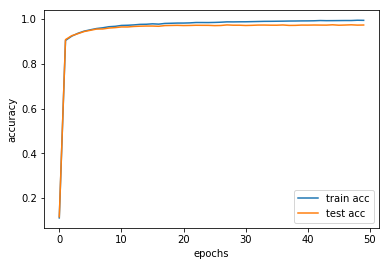

In [4]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# x_train = x_train[:1000, :]
# t_train = t_train[:1000, :]

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

epochs = 50
train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(train_size // batch_size, 1)
iters_num = iter_per_epoch * epochs

learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    if i % iter_per_epoch == 0:
        loss = network.loss(x_batch, t_batch)
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_loss_list.append(loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('epoch:{0:<3}| train loss:{1:.4f}, train acc:{2:.4f}, test acc:{3:.4f}'
              .format(i//iter_per_epoch + 1, loss, train_acc, test_acc))

# グラフの描画
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()